# ДЗ №2
**Анализ датасета**

Датасет содержит различные сведения о банковских клиентах, такие как их семейное положение, неплатежи по кредиту или нет, их возраст, работа, образование и т. д. Этот набор данных представляет собой набор банковских маркетинговых данных для клиента.

In [9]:
# Импортирую библиотеки, которые нужны для анализа. Предварительно подготовил и очистил датасет. Оставил нужные столбцы.

import pandas as pd
import numpy as np
%matplotlib inline
from ipywidgets import interact, IntSlider
import seaborn as sns
import scipy.stats as st
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, f1_score, roc_auc_score, roc_curve, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
#Адаптируем scv формат, удаляем хедер, присваиваем новые названия колонкам.

bank = pd.read_csv('Hometask1/bankmarketing.csv', sep=';',header = None, names=['Возраст','Работа', "Семейное положение", 'Образование','Задолженность','Ипотека','Кредит','Контакт','Месяц звонка','День недели звонка','Длительность звонка','Рекламная компания','Результат рекламы'])
bank

,Возраст,Работа,Семейное положение,Образование,Задолженность,Ипотека,Кредит,Контакт,Месяц звонка,День недели звонка,Длительность звонка,Рекламная компания,Результат рекламы
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,nonexistent
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,nonexistent
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,nonexistent
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,nonexistent
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,nonexistent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,nonexistent
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,nonexistent
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,nonexistent
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,nonexistent


In [3]:
#Выводим первые и последние 10 значений

bank.head (10)

,Возраст,Работа,Семейное положение,Образование,Задолженность,Ипотека,Кредит,Контакт,Месяц звонка,День недели звонка,Длительность звонка,Рекламная компания,Результат рекламы
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,nonexistent
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,nonexistent
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,nonexistent
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,nonexistent
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,nonexistent
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,nonexistent
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,nonexistent
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,nonexistent
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,nonexistent
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,nonexistent


In [4]:
#Выводим все названия колонок

bank.columns

Index(['Возраст', 'Работа', 'Семейное положение', 'Образование',
       'Задолженность', 'Ипотека', 'Кредит', 'Контакт', 'Месяц звонка',
       'День недели звонка', 'Длительность звонка', 'Рекламная компания',
       'Результат рекламы'],
      dtype='object')

In [5]:
bank.tail (10)

,Возраст,Работа,Семейное положение,Образование,Задолженность,Ипотека,Кредит,Контакт,Месяц звонка,День недели звонка,Длительность звонка,Рекламная компания,Результат рекламы
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,483,2,success
41179,64,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,151,3,nonexistent
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,254,2,nonexistent
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,281,1,nonexistent
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,112,1,success
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,nonexistent
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,nonexistent
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,nonexistent
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,nonexistent
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,failure


In [6]:
#Объем датафрейма

bank.shape

(41188, 13)

In [7]:
#Выбираем определенный отрезок датафрейма

bank.iloc [100:120]

,Возраст,Работа,Семейное положение,Образование,Задолженность,Ипотека,Кредит,Контакт,Месяц звонка,День недели звонка,Длительность звонка,Рекламная компания,Результат рекламы
100,54,services,married,unknown,no,yes,no,telephone,may,mon,229,1,nonexistent
101,49,blue-collar,married,basic.4y,no,no,no,telephone,may,mon,55,3,nonexistent
102,54,services,married,unknown,no,no,no,telephone,may,mon,400,1,nonexistent
103,52,admin.,divorced,university.degree,no,no,no,telephone,may,mon,197,1,nonexistent
104,52,admin.,divorced,university.degree,no,no,no,telephone,may,mon,190,1,nonexistent
105,43,services,single,high.school,unknown,no,no,telephone,may,mon,21,1,nonexistent
106,34,housemaid,married,basic.6y,no,yes,no,telephone,may,mon,300,2,nonexistent
107,35,admin.,married,high.school,no,yes,no,telephone,may,mon,123,2,nonexistent
108,42,entrepreneur,married,unknown,unknown,yes,no,telephone,may,mon,293,1,nonexistent
109,43,technician,married,unknown,unknown,yes,yes,telephone,may,mon,325,1,nonexistent


In [8]:
#Создаем новую переменную

bank_categ = bank[['Возраст','Работа', "Семейное положение", 'Образование','Задолженность','Ипотека','Кредит','Контакт','Месяц звонка','День недели звонка','Длительность звонка','Рекламная компания','Результат рекламы']]

In [9]:
bank_categ

,Возраст,Работа,Семейное положение,Образование,Задолженность,Ипотека,Кредит,Контакт,Месяц звонка,День недели звонка,Длительность звонка,Рекламная компания,Результат рекламы
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,nonexistent
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,nonexistent
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,nonexistent
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,nonexistent
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,nonexistent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,nonexistent
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,nonexistent
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,nonexistent
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,nonexistent



**Кластерезуем возраст по группам**


In [10]:
bank_categ['Возрастное распределение'] = pd.cut(bank_categ['Возраст'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])

In [11]:
bank_categ  = bank_categ.drop('Возраст',axis = 1)
bank_categ

,Работа,Семейное положение,Образование,Задолженность,Ипотека,Кредит,Контакт,Месяц звонка,День недели звонка,Длительность звонка,Рекламная компания,Результат рекламы,Возрастное распределение
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,nonexistent,50-60
1,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,nonexistent,50-60
2,services,married,high.school,no,yes,no,telephone,may,mon,226,1,nonexistent,30-40
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,nonexistent,30-40
4,services,married,high.school,no,no,yes,telephone,may,mon,307,1,nonexistent,50-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,nonexistent,70-80
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,nonexistent,40-50
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,nonexistent,50-60
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,nonexistent,40-50



**Выявляем уникальные значения в столбцах**


In [12]:
bank_categ ['Работа'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [13]:
bank_categ ['Образование'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [14]:
bank_categ ['Результат рекламы'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [15]:
bank_categ ['Контакт'].unique()

array(['telephone', 'cellular'], dtype=object)


**Смотрим информацию про датафрейм**

Все данные заполненны, понимаем типы данных. Есть 2 колонки с вещественными числами. Остальные текстовые. И одна категория, которую мы создали.


In [16]:
bank_categ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Работа                    41188 non-null  object  
 1   Семейное положение        41188 non-null  object  
 2   Образование               41188 non-null  object  
 3   Задолженность             41188 non-null  object  
 4   Ипотека                   41188 non-null  object  
 5   Кредит                    41188 non-null  object  
 6   Контакт                   41188 non-null  object  
 7   Месяц звонка              41188 non-null  object  
 8   День недели звонка        41188 non-null  object  
 9   Длительность звонка       41188 non-null  int64   
 10  Рекламная компания        41188 non-null  int64   
 11  Результат рекламы         41188 non-null  object  
 12  Возрастное распределение  41188 non-null  category
dtypes: category(1), int64(2), object(10)
memory us


**Фильтруем по параметрам "Работа", "Задолженность"  и "Ипотека"**

Узнаем, что у 3691 нашего клиента есть и Ипотека и Кредит. Большинство клиентов женаты. Мало у кого есть кредит (6248 человек). Среди всех владельцев кредита, ни у кого нет Задолженности по нему. У большей части сегмента (52%) нет ипотеки (могли бы предложить ипотеку). Поэтому если этой рекламной компании мы хотели бы предложить кредитный продукт, то это наша ЦА.

Также мы узнали, что успешных рекламных компаний было всего 1373. Также мы знаем, что это телефонная реклама -> скорее всего не самый лучший инструмент для сегменты. Видим, что результаты данных маркетинговых акция очень плохи, так как всего чуть больше 3% успешных коммуникаций с клиентом. Нужно что-то менять.

Также более 46% 

In [17]:
bank[(bank["Кредит"]=="yes")&(bank["Ипотека"]=="yes")]

,Возраст,Работа,Семейное положение,Образование,Задолженность,Ипотека,Кредит,Контакт,Месяц звонка,День недели звонка,Длительность звонка,Рекламная компания,Результат рекламы
15,54,retired,married,basic.9y,unknown,yes,yes,telephone,may,mon,174,1,nonexistent
17,46,blue-collar,married,basic.6y,unknown,yes,yes,telephone,may,mon,440,1,nonexistent
18,50,blue-collar,married,basic.9y,no,yes,yes,telephone,may,mon,353,1,nonexistent
46,57,admin.,married,university.degree,no,yes,yes,telephone,may,mon,616,1,nonexistent
58,55,unemployed,married,professional.course,unknown,yes,yes,telephone,may,mon,145,1,nonexistent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,24,technician,single,university.degree,no,yes,yes,cellular,nov,tue,467,3,failure
41085,51,admin.,divorced,high.school,no,yes,yes,cellular,nov,tue,334,2,failure
41098,29,student,single,high.school,no,yes,yes,cellular,nov,thu,289,1,success
41127,61,admin.,married,high.school,no,yes,yes,cellular,nov,wed,386,2,nonexistent


In [18]:
bank[(bank["Кредит"]=="yes")].shape

(6248, 13)

In [19]:
bank[(bank["Кредит"]=="yes")&(bank["Задолженность"]=="yes")].shape

(0, 13)

<AxesSubplot:ylabel='Задолженность'>

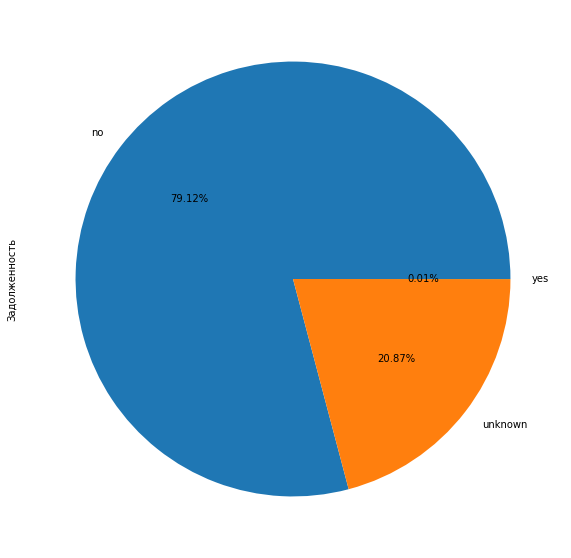

In [20]:
plt.figure(figsize=(10,10))
bank['Задолженность'].value_counts().plot(kind='pie',autopct='%0.2f%%')

У половины есть ипотека. Делаем бинарным.

<AxesSubplot:ylabel='Ипотека'>

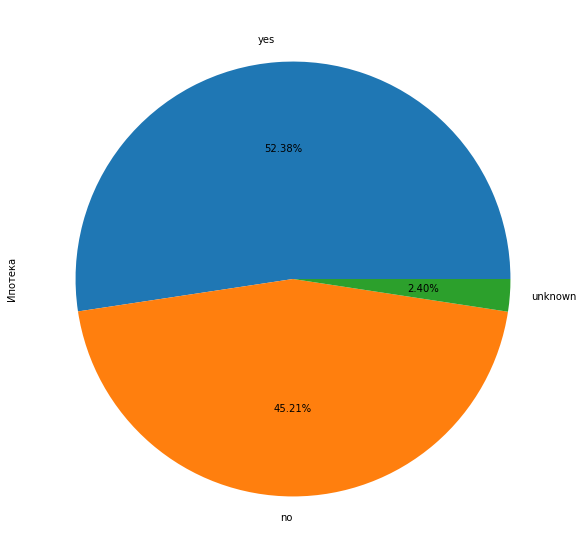

In [21]:
plt.figure(figsize=(10,10))
bank['Ипотека'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [22]:
bank['Ипотека'] = bank['Ипотека'].apply(lambda x: {"yes":1, "no":0, "unknown":pd.NA}[x])

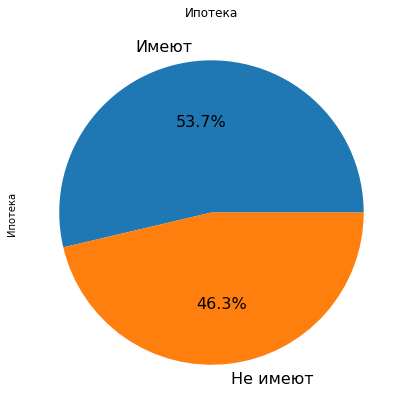

In [23]:
bank['Ипотека'].value_counts().rename(index={1:"Имеют", 0:"Не имеют"}).plot(kind='pie', 
title="Ипотека",
fontsize=16,
legend=False,
autopct='%1.1f%%',
 figsize=(7,7));

У большинства нет потреб. кредита. Делаем бинарной.

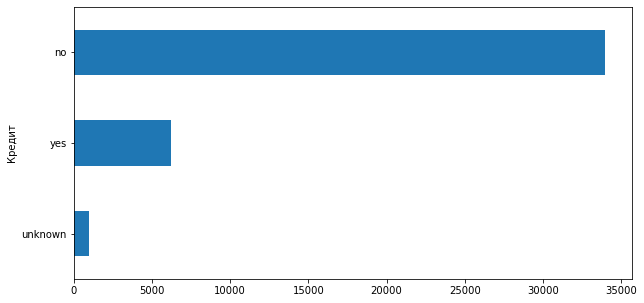

In [24]:
bank['Кредит'].value_counts().sort_values(ascending=True).plot.barh(figsize=(10,5), xlabel="Кредит");

In [25]:
bank['Кредит'] = bank['Кредит'].apply(lambda x: {"yes":1, "no":0, "unknown":pd.NA}[x])

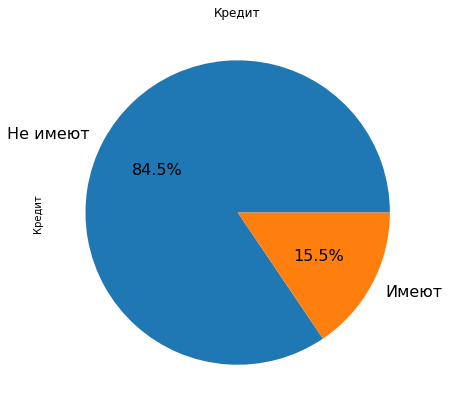

In [26]:
bank['Кредит'].value_counts().rename(index={1:"Имеют", 0:"Не имеют"}).plot(kind='pie', title="Кредит", fontsize=16,
legend=False,
autopct='%1.1f%%',
figsize=(7,7));

<AxesSubplot:ylabel='Семейное положение'>

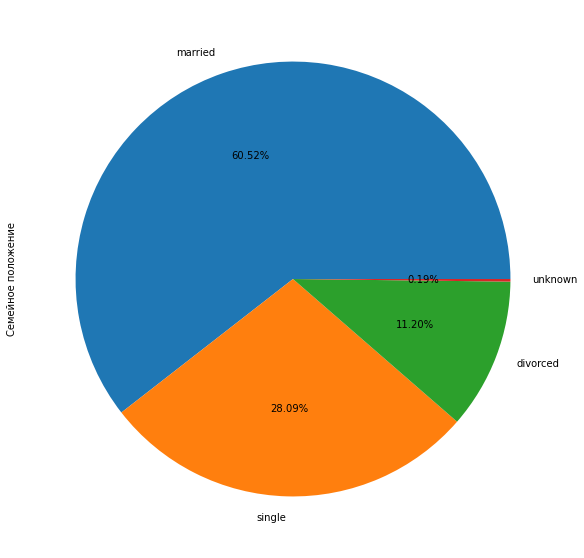

In [27]:
plt.figure(figsize=(10,10))
bank['Семейное положение'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [28]:
bank[(bank["Результат рекламы"]=="failure")].shape

(4252, 13)

In [29]:
bank[(bank["Результат рекламы"]=="success")].shape

(1373, 13)

<AxesSubplot:ylabel='Результат рекламы'>

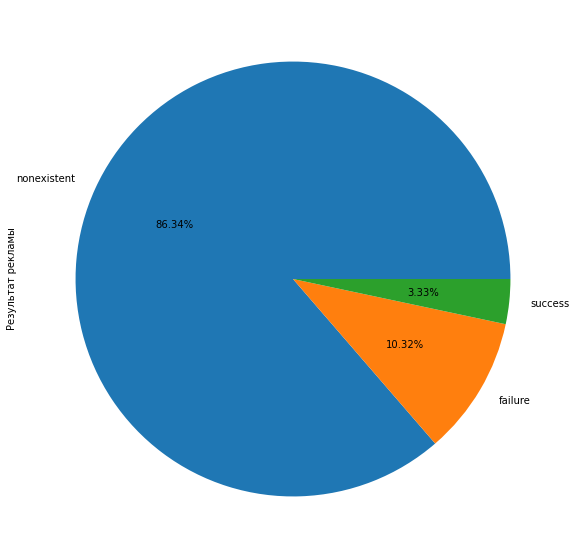

In [30]:
plt.figure(figsize=(10,10))
bank['Результат рекламы'].value_counts().plot(kind='pie',autopct='%0.2f%%')

**Посмотрим распределение по Работе относительного Семейного положения и Успеха рекламы**

Технари и студенты - одиночки в большей степени не женаты, а админы и менеджеры в большей женаты.
Хоть у админов больше успеха относительно рекламных компаний среди всех, но и их больше всех. Но закономерно, что у безработных, уборщиков,студентов, на пенсии разница в успехе и неудаче минимальная. Компаний больше неуспешных. 

In [31]:
#Составили кросс-таблицу для работы и семейных отношений
pd.crosstab(bank['Работа'],bank['Результат рекламы'],margins=True)

Результат рекламы,failure,nonexistent,success,All
Работа,,,,
admin.,1091,8903,428,10422
blue-collar,886,8249,119,9254
entrepreneur,154,1277,25,1456
housemaid,74,948,38,1060
management,331,2498,95,2924
retired,230,1332,158,1720
self-employed,145,1246,30,1421
services,448,3451,70,3969
student,163,594,118,875


In [32]:
#Составили кросс-таблицу для работы и семейных отношений
pd.crosstab(bank['Работа'],bank['Семейное положение'],margins=True)

Семейное положение,divorced,married,single,unknown,All
Работа,,,,,
admin.,1280,5253,3875,14,10422
blue-collar,728,6687,1825,14,9254
entrepreneur,179,1071,203,3,1456
housemaid,161,777,119,3,1060
management,331,2089,501,3,2924
retired,348,1274,93,5,1720
self-employed,133,904,379,5,1421
services,532,2294,1137,6,3969
student,9,41,824,1,875


**Отсортируем данные по возрастанию и убыванию**

Посмотрим сортировку по Длительности звонка + рекламных компаний
Видно, что люди, пришедшие  от первой рекламной компании, дольше всех находятся в банке.

In [33]:
bank.sort_values (by=['Длительность звонка','Рекламная компания'],ascending = [True,False])

,Возраст,Работа,Семейное положение,Образование,Задолженность,Ипотека,Кредит,Контакт,Месяц звонка,День недели звонка,Длительность звонка,Рекламная компания,Результат рекламы
23031,59,management,married,university.degree,no,1,0,cellular,aug,tue,0,10,nonexistent
6251,39,admin.,married,high.school,no,1,0,telephone,may,tue,0,4,nonexistent
28063,53,blue-collar,divorced,high.school,no,1,0,cellular,apr,fri,0,3,nonexistent
33015,31,blue-collar,married,basic.9y,no,0,0,cellular,may,mon,0,2,nonexistent
28239,44,blue-collar,married,basic.9y,no,0,0,cellular,apr,tue,1,1,nonexistent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7727,37,unemployed,married,professional.course,no,1,0,telephone,may,fri,3631,2,nonexistent
13820,31,technician,married,professional.course,no,0,0,cellular,jul,thu,3643,1,nonexistent
40537,27,admin.,single,high.school,no,0,0,telephone,aug,fri,3785,1,nonexistent
22192,52,blue-collar,married,basic.4y,no,0,0,telephone,aug,thu,4199,3,nonexistent


In [34]:
bank.sort_values (by=['Длительность звонка'])

,Возраст,Работа,Семейное положение,Образование,Задолженность,Ипотека,Кредит,Контакт,Месяц звонка,День недели звонка,Длительность звонка,Рекламная компания,Результат рекламы
33015,31,blue-collar,married,basic.9y,no,0,0,cellular,may,mon,0,2,nonexistent
23031,59,management,married,university.degree,no,1,0,cellular,aug,tue,0,10,nonexistent
28063,53,blue-collar,divorced,high.school,no,1,0,cellular,apr,fri,0,3,nonexistent
6251,39,admin.,married,high.school,no,1,0,telephone,may,tue,0,4,nonexistent
28239,44,blue-collar,married,basic.9y,no,0,0,cellular,apr,tue,1,1,nonexistent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7727,37,unemployed,married,professional.course,no,1,0,telephone,may,fri,3631,2,nonexistent
13820,31,technician,married,professional.course,no,0,0,cellular,jul,thu,3643,1,nonexistent
40537,27,admin.,single,high.school,no,0,0,telephone,aug,fri,3785,1,nonexistent
22192,52,blue-collar,married,basic.4y,no,0,0,telephone,aug,thu,4199,3,nonexistent


In [35]:
bank.sort_values (by=['Длительность звонка'],ascending = [False]).head (10)

,Возраст,Работа,Семейное положение,Образование,Задолженность,Ипотека,Кредит,Контакт,Месяц звонка,День недели звонка,Длительность звонка,Рекламная компания,Результат рекламы
24091,33,technician,single,professional.course,no,1,0,telephone,nov,mon,4918,1,nonexistent
22192,52,blue-collar,married,basic.4y,no,0,0,telephone,aug,thu,4199,3,nonexistent
40537,27,admin.,single,high.school,no,0,0,telephone,aug,fri,3785,1,nonexistent
13820,31,technician,married,professional.course,no,0,0,cellular,jul,thu,3643,1,nonexistent
7727,37,unemployed,married,professional.course,no,1,0,telephone,may,fri,3631,2,nonexistent
36043,28,blue-collar,married,basic.9y,no,1,0,cellular,may,tue,3509,2,success
19632,47,management,married,high.school,no,0,0,cellular,aug,thu,3422,1,nonexistent
2313,39,self-employed,married,basic.4y,unknown,1,0,telephone,may,tue,3366,3,nonexistent
20996,47,admin.,married,high.school,no,1,1,cellular,aug,thu,3322,1,nonexistent
24043,27,blue-collar,single,professional.course,no,1,0,telephone,oct,mon,3284,1,nonexistent


In [36]:
bank.sort_values (by=['Рекламная компания'],ascending = [False]).head (10)

,Возраст,Работа,Семейное положение,Образование,Задолженность,Ипотека,Кредит,Контакт,Месяц звонка,День недели звонка,Длительность звонка,Рекламная компания,Результат рекламы
4107,32,admin.,married,university.degree,unknown,<NA>,<NA>,telephone,may,mon,261,56,nonexistent
18728,54,admin.,married,university.degree,unknown,1,0,cellular,jul,thu,65,43,nonexistent
13447,32,technician,single,university.degree,no,1,1,telephone,jul,wed,16,43,nonexistent
4168,29,technician,married,professional.course,no,1,0,telephone,may,mon,124,42,nonexistent
5304,44,retired,married,basic.9y,no,1,0,telephone,may,fri,147,42,nonexistent
11033,38,blue-collar,married,basic.4y,no,1,0,telephone,jun,wed,25,41,nonexistent
18754,36,admin.,single,university.degree,no,0,0,cellular,jul,thu,18,40,nonexistent
11769,56,self-employed,married,professional.course,no,0,1,telephone,jun,fri,13,40,nonexistent
4114,52,entrepreneur,married,university.degree,no,0,0,telephone,may,mon,44,39,nonexistent
11593,43,technician,married,high.school,no,1,0,telephone,jun,fri,17,37,nonexistent


In [37]:
bank['Рекламная компания'].sort_values(ascending = False)

4107     56
18728    43
13447    43
4168     42
5304     42
         ..
24312     1
24309     1
24308     1
24307     1
0         1
Name: Рекламная компания, Length: 41188, dtype: int64

In [38]:
bank.sort_values (by=['Рекламная компания','Длительность звонка'],ascending = [False,True])

,Возраст,Работа,Семейное положение,Образование,Задолженность,Ипотека,Кредит,Контакт,Месяц звонка,День недели звонка,Длительность звонка,Рекламная компания,Результат рекламы
4107,32,admin.,married,university.degree,unknown,<NA>,<NA>,telephone,may,mon,261,56,nonexistent
13447,32,technician,single,university.degree,no,1,1,telephone,jul,wed,16,43,nonexistent
18728,54,admin.,married,university.degree,unknown,1,0,cellular,jul,thu,65,43,nonexistent
4168,29,technician,married,professional.course,no,1,0,telephone,may,mon,124,42,nonexistent
5304,44,retired,married,basic.9y,no,1,0,telephone,may,fri,147,42,nonexistent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20996,47,admin.,married,high.school,no,1,1,cellular,aug,thu,3322,1,nonexistent
19632,47,management,married,high.school,no,0,0,cellular,aug,thu,3422,1,nonexistent
13820,31,technician,married,professional.course,no,0,0,cellular,jul,thu,3643,1,nonexistent
40537,27,admin.,single,high.school,no,0,0,telephone,aug,fri,3785,1,nonexistent


In [39]:
bank.sort_values (by=['Рекламная компания','Длительность звонка'],ascending = [False,True]).tail(20)

,Возраст,Работа,Семейное положение,Образование,Задолженность,Ипотека,Кредит,Контакт,Месяц звонка,День недели звонка,Длительность звонка,Рекламная компания,Результат рекламы
28287,29,blue-collar,single,high.school,no,1,1,cellular,apr,wed,2129,1,failure
38388,59,housemaid,married,basic.4y,no,0,0,telephone,oct,tue,2187,1,nonexistent
19313,39,admin.,single,university.degree,no,1,0,cellular,aug,wed,2191,1,nonexistent
36510,39,admin.,married,university.degree,no,0,0,cellular,jun,wed,2219,1,failure
2330,38,blue-collar,single,basic.9y,no,1,0,telephone,may,tue,2231,1,nonexistent
35559,33,blue-collar,single,high.school,no,0,0,cellular,may,mon,2301,1,nonexistent
28166,57,blue-collar,married,high.school,no,1,1,cellular,apr,mon,2316,1,nonexistent
24008,35,entrepreneur,married,university.degree,no,1,1,telephone,oct,mon,2429,1,nonexistent
1689,26,admin.,married,high.school,no,1,1,telephone,may,fri,2462,1,nonexistent
39171,53,admin.,divorced,university.degree,no,0,0,cellular,mar,thu,2486,1,nonexistent


**Узнаем в какой день было чаще звонков и какой месяц был самый продуктивный**

Продуктивным был конец осени и летний период. Лучший май. Разницы от выбора дня особой нет.

In [40]:
pd.crosstab(bank['Месяц звонка'],bank['Результат рекламы'],margins=True)

Результат рекламы,failure,nonexistent,success,All
Месяц звонка,,,,
apr,647,1874,111,2632
aug,254,5719,205,6178
dec,39,98,45,182
jul,120,6946,108,7174
jun,171,5003,144,5318
mar,98,367,81,546
may,1779,11760,230,13769
nov,839,3097,165,4101
oct,168,414,136,718


<AxesSubplot:>

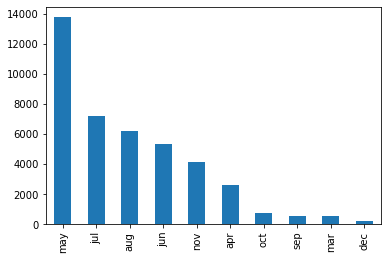

In [41]:
bank['Месяц звонка'].value_counts().plot(kind='bar')

**Создаем переменные для месяцев и недель + переменные для образования**

In [42]:
day_number = {'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5}
bank['День недели звонка'] = bank['День недели звонка'].apply(lambda x: day_number[x])

In [43]:
month_number = {'mar':3, 'apr':4,'may':5, 'jun':6, 'jul':7, 'aug':8,'sep':9, 'oct':10, 'nov':11, 'dec':12}
bank['Месяц звонка'] = bank['Месяц звонка'].apply(lambda x: month_number[x])

In [78]:
educ = {'basic.4y':1, 'high.school':4, 'basic.6y':2, 'basic.9y':3,
       'professional.course':5, 'unknown':0, 'university.degree':6,
       'illiterate':0}
bank['Образование'] = bank['Образование'].apply(lambda x: educ[x])

In [85]:
bank_features = ['age', "educ",
                "month_number", "day_number", 'Длительность звонка', 'Рекламная компания']
plt.figure(figsize = (16,16))
sns.heatmap(abs(bank[bank_features].corr()), annot=True, fmt=".2f", cmap="rocket_r");

KeyError: "['age', 'educ', 'month_number', 'day_number'] not in index"

<Figure size 1152x1152 with 0 Axes>

**Как возраст влияет на наличие ипотеки, кредита и резуальтат рекламы**

Видим, что более высокий средний возраст успешен для рекламной активности.Влияние на Ипотеку и кредит одинаковое.Также Задолженность свойствененна более высокому средниму возрасту.

<AxesSubplot:xlabel='Результат рекламы'>

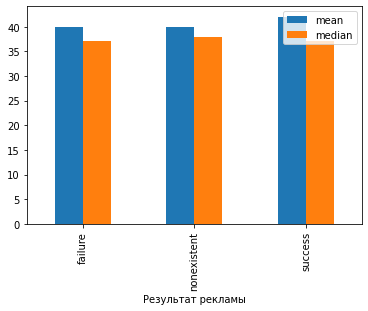

In [44]:
#Используем функцию groupby для группировки возрастов. Считаем сразу медиану и сред. арифм.
bank.groupby("Результат рекламы")['Возраст'].agg(["mean", 'median']).plot(kind='bar')

<AxesSubplot:xlabel='Задолженность'>

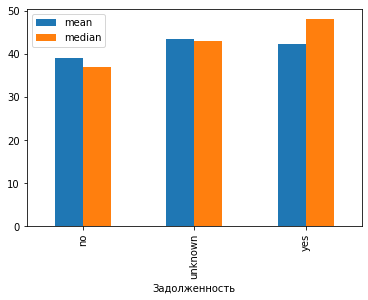

In [45]:
bank.groupby(["Задолженность"])['Возраст'].agg(["mean", 'median']).plot(kind='bar')

Видим как возраст влияет на образование. Также стоит заметить, что кол-во необразованных в датафрейме очень маленькое - 0,04%

<AxesSubplot:xlabel='Образование'>

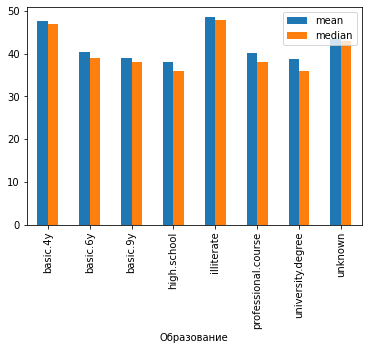

In [46]:
bank.groupby("Образование")['Возраст'].agg(["mean", 'median']).plot(kind='bar')

<AxesSubplot:xlabel='Образование'>

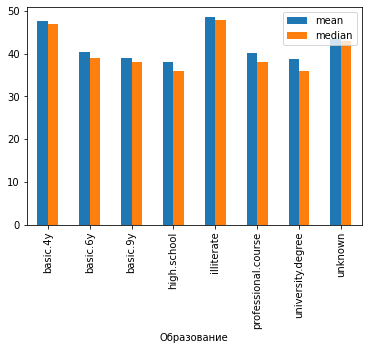

In [47]:
bank.groupby("Образование")['Возраст'].agg(["mean", 'median']).plot(kind='bar')

**Как образование влияет на кредит**

In [48]:

pd.pivot_table(bank,index='Семейное положение',columns=['Образование','Кредит'],values='Возраст',aggfunc='count',margins=True).round(2)

Образование        basic.4y        basic.6y        basic.9y         \
Кредит                    0      1        0      1        0      1   
Семейное положение                                                   
divorced              408.0   74.0    150.0   24.0    479.0   70.0   
married              2659.0  477.0   1476.0  253.0   3449.0  606.0   
single                363.0   73.0    271.0   52.0   1076.0  206.0   
unknown                 5.0    NaN      5.0    1.0      7.0    1.0   
All                  3435.0  624.0   1902.0  330.0   5011.0  883.0   

Образование        high.school         illiterate      professional.course  \
Кредит                       0       1          0    1                   0   
Семейное положение                                                           
divorced                 973.0   193.0        2.0  NaN               538.0   
married                 4254.0   786.0       12.0  3.0              2587.0   
single                  2614.0   461.0        1.0  NaN              1195.0   
unknown                   11.0     3.0        NaN  NaN                 5.0   
All                     7852.0  1443.0       15.0  3.0              4325.0   

Образование               university.degree         unknown           All  
Кредит                  1                 0       1       0      1         
Семейное положение                                                         
divorced             99.0            1108.0   192.0   158.0   23.0   4491  
married             502.0            5241.0  1002.0   889.0  144.0  24340  
single              191.0            3585.0   732.0   395.0   73.0  11288  
unknown               1.0              27.0     4.0     7.0    2.0     79  
All                 793.0            9961.0  1930.0  1449.0  242.0  40198

In [49]:
pd.pivot_table(bank,index="Образование",columns=['Кредит'],values='Возраст',aggfunc='count',margins=True).round(2)

Кредит,0,1,All
Образование,,,
basic.4y,3435,624,4059
basic.6y,1902,330,2232
basic.9y,5011,883,5894
high.school,7852,1443,9295
illiterate,15,3,18
professional.course,4325,793,5118
university.degree,9961,1930,11891
unknown,1449,242,1691
All,33950,6248,40198


<AxesSubplot:xlabel='Семейное положение'>

<Figure size 1440x1080 with 0 Axes>

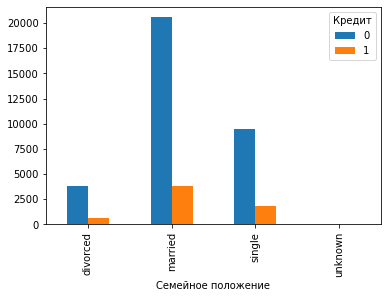

In [50]:
plt.figure(figsize=(20,15))
pd.pivot_table(bank,index='Семейное положение',columns='Кредит',values='Возраст',aggfunc='count').round(2).plot(kind='bar')

**Как возраст влияет на способ связи**

Благодаря группировки поняли, что чаще всего более возрастные используют обычный телефон, что логично. Также большинство пользуется сотовой связью.


<AxesSubplot:xlabel='Контакт'>

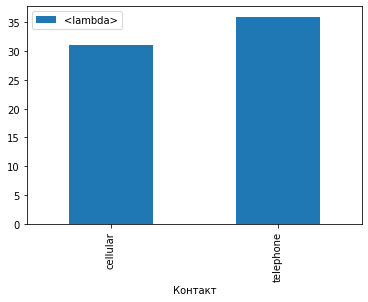

In [51]:
bank.groupby("Контакт")['Возраст'].agg([lambda x: x.value_counts().index[0]]).plot(kind='bar')

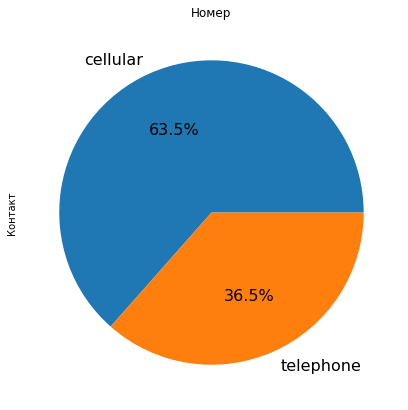

In [52]:
bank['Контакт'].value_counts().plot(kind='pie', title="Номер", fontsize=16, legend=False, autopct='%1.1f%%',figsize=(7,7));


**Как связана работа с кредитом**

<AxesSubplot:xlabel='Работа'>

<Figure size 1440x1080 with 0 Axes>

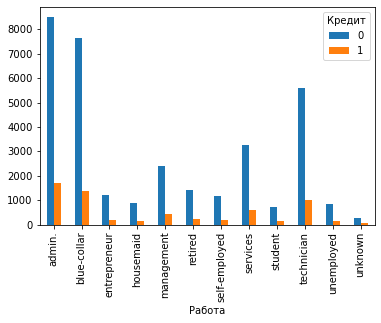

In [53]:
plt.figure(figsize=(20,15))
pd.pivot_table(bank,index='Работа',columns='Кредит',values='Возраст',aggfunc='count').round(2).plot(kind='bar')

**Группировка по месяцам, дням, работе и возрасту**

Поняли какое в среднем возрастное распределение
В декабре более высокий возраст обзванивался

[]

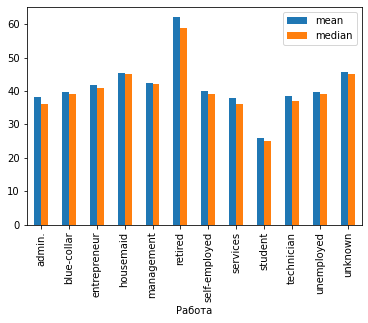

In [54]:
bank.groupby('Работа')['Возраст'].agg(["mean", 'median']).plot(kind='bar').plot(kind='bar')

[]

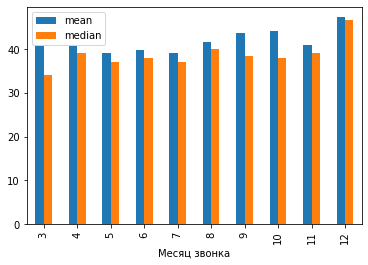

In [55]:
bank.groupby('Месяц звонка')['Возраст'].agg(["mean", 'median']).plot(kind='bar').plot(kind='bar')

**Визуализируем распределение по параметрам "Работа"**

Видим, что администраторов и голубых воротничков среди клиентов больше всего.

In [56]:
import matplotlib.pyplot as plt


In [57]:
job = pd.DataFrame(bank_categ['Работа'].value_counts())

<AxesSubplot:ylabel='Работа'>

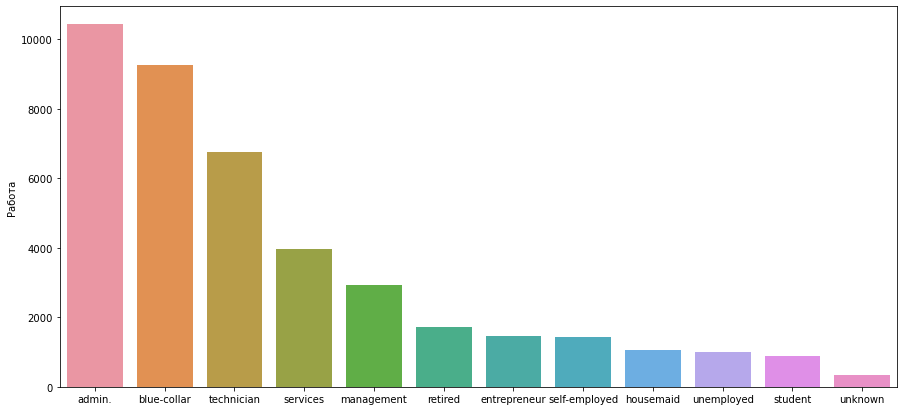

In [58]:
plt.figure(figsize=(15, 7))
sns.barplot(x=job.index, y=job['Работа'])

**Смотрим доли каждого вида образования у клиентов**

Большинство с университетским образованием, но если смотреть на высшее и невысшее образование, то сегмент без высшего образования выше. Следовательно хотели, возможно, использовать финансовую неграмотность клиентов в маркетинговой компании. 

<AxesSubplot:ylabel='Образование'>

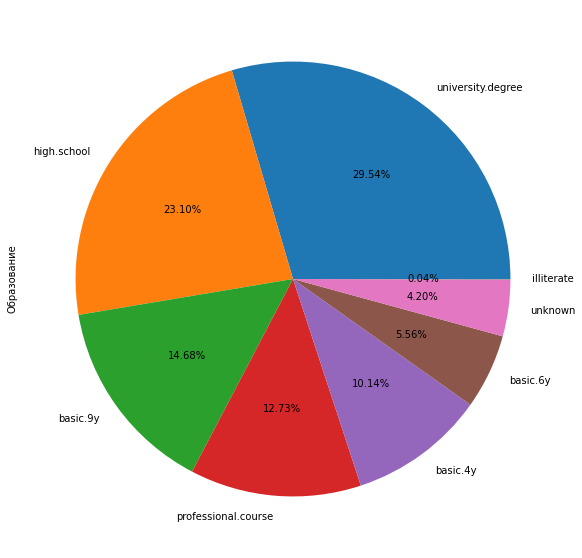

In [59]:
plt.figure(figsize=(10,10))
bank['Образование'].value_counts().plot(kind='pie',autopct='%0.2f%%')



**Найдем все 3 меры центральной тенденции для количественных переменных**

Получается 180 дней - делит ровно пополам все значения в распределении, а сред. арифм - 258. Но максимальное значение 4918 - это большой размах, но допустим для пользователей, которые уже долго в компании.
 
 Интересно посмотреть на возраст: размах большой -81 год (что говорит на охват реклам и на молодой и старший сегмент). Срднее арифм - 40 лет и мода - 38 лет. Хорошее распредленеие.
 
 Рекламных компаний было много, но наибольший эффект дала 2 компания - мода. Получается, что остальные компании уже не давали такого эффекта. Это может говорить о том, что данный канал маркетинга уже не сильно подходит для привлечения. Нужно менять способ коммуникации, УТП и тд.

In [60]:
bank.describe().T.style.background_gradient(cmap = "viridis")

,count,mean,std,min,25%,50%,75%,max
Возраст,41188.000000,40.024060,10.421250,17.000000,32.000000,38.000000,47.000000,98.000000
Месяц звонка,41188.000000,6.607896,2.040998,3.000000,5.000000,6.000000,8.000000,12.000000
День недели звонка,41188.000000,2.979581,1.411514,1.000000,2.000000,3.000000,4.000000,5.000000
Длительность звонка,41188.000000,258.285010,259.279249,0.000000,102.000000,180.000000,319.000000,4918.000000
Рекламная компания,41188.000000,2.567593,2.770014,1.000000,1.000000,2.000000,3.000000,56.000000


In [61]:
age_df = pd.DataFrame(bank_categ['Возрастное распределение'].value_counts())

<AxesSubplot:ylabel='Возрастное распределение'>

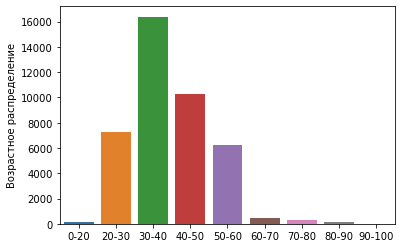

In [62]:
sns.barplot(x=age_df.index, y=age_df['Возрастное распределение'])

In [63]:
#Среднее арифметическое массива
bank['Длительность звонка'].mean() 

258.2850101971448

In [64]:
#Найдем медиану
bank['Длительность звонка'].median()

180.0

In [65]:
#Найдем моду
bank['Длительность звонка'].mode()

0    85
1    90
dtype: int64

<AxesSubplot:>

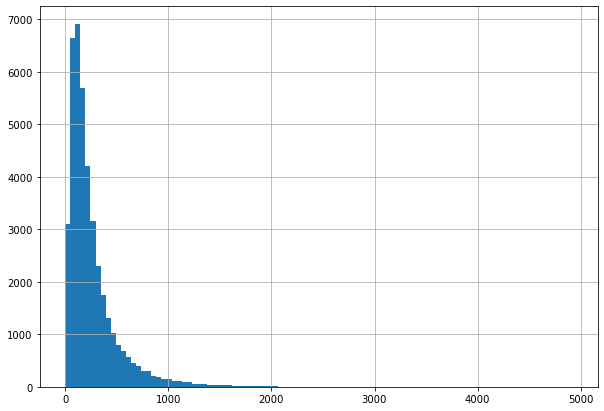

In [66]:
plt.figure(figsize=(10, 7))
bank['Длительность звонка'].hist(bins=100)

In [67]:
#Найдем размах
bank['Длительность звонка'].max() - bank['Длительность звонка'].min()

4918

In [68]:
# интерквартильный размах
np.percentile(bank['Длительность звонка'],75) - np.percentile(bank['Длительность звонка'],25)

217.0

In [69]:
#дисперсию,среднеквадрат отклонение для выборки
bank_mean = bank['Длительность звонка'].mean()
deviations = bank['Длительность звонка'] - bank_mean
sq_deviations = deviations ** 2
variance_samp = sq_deviations.sum() / (len(bank) - 1)
std_samp = np.sqrt(variance_samp)
print(variance_samp)
print(std_samp)
            


67225.72887720143
259.2792488364648


In [70]:
#Находим дисперсию,среднеквадрат отклонение для гениральной совокупности
variance_pop = sq_deviations.sum() / (len(bank))
print(variance_pop)
print(np.sqrt(variance_pop))

67224.09670936425
259.27610130778396


In [71]:
#для выборки
print(bank['Длительность звонка'].var())
print(bank['Длительность звонка'].std())

67225.72887720143
259.2792488364648


In [72]:
#для ген совокупности
print(bank['Длительность звонка'].var(ddof=0))
print(bank['Длительность звонка'].std(ddof=0))

67224.09670936425
259.27610130778396


Проверяем на выбросы

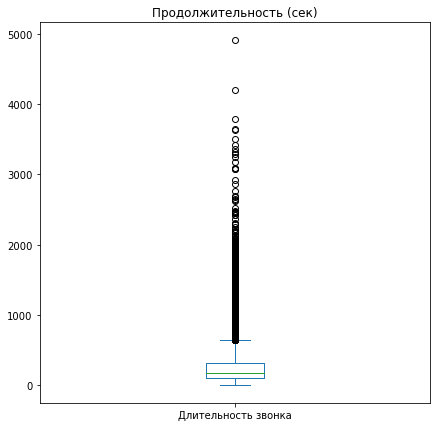

In [80]:
bank['Длительность звонка'].plot.box(figsize=(7, 7), title='Продолжительность (сек)');

# ***ИТОГИ 1 части***

1) Было выявлено, что данная рекламная компания была неэффективна - 3% успеха (в начале телефонный обзвон был эффективен, но потом перестал таким быть). Ошибка в способе коммуникации или выборе УТП для нее.

2) Сегмент для акции был выбран правильно, так как у большинства нет кредита, у большинства нет ипотеки, но есть семья.

3) Также нужно было больше сконцентрироваться на безработных, студентах, уборщиках, а не на админах и менеджерах в более возрастной категории (40-50). С более низким уровнем образования сегмент является более восприимчивым к кредитам.  



# ***Часть 2***

In [274]:
df = pd.read_csv('bankmarketing1.csv', sep=';',header = None, names=['Возраст','Работа', "Семейное положение", 'Образование','Задолженность','Ипотека','Кредит','Контакт','Месяц звонка','День недели звонка','Длительность звонка','Рекламная компания','Результат рекламы', 'Приобрёл'])
df

,Возраст,Работа,Семейное положение,Образование,Задолженность,Ипотека,Кредит,Контакт,Месяц звонка,День недели звонка,Длительность звонка,Рекламная компания,Результат рекламы,Приобрёл
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,nonexistent,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,nonexistent,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,nonexistent,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,nonexistent,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,nonexistent,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,nonexistent,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,nonexistent,yes


In [275]:
df['Кредит'] = df['Кредит'].apply(lambda x: {"yes":1, "no":0, "unknown":pd.NA}[x])

In [276]:
df['Ипотека'] = df['Ипотека'].apply(lambda x: {"yes":1, "no":0, "unknown":pd.NA}[x])

In [277]:
df['Приобрёл'] = df['Приобрёл'].apply(lambda x: {"yes":1, "no":0, "unknown":pd.NA}[x])

In [278]:
ed_dict = {'basic.4y':1, 'high.school':4, 'basic.6y':2, 'basic.9y':3,
       'professional.course':5, 'unknown':0, 'university.degree':6,
       'illiterate':0}
df["Образование"] = df["Образование"].apply(lambda x: ed_dict[x])

<AxesSubplot: >

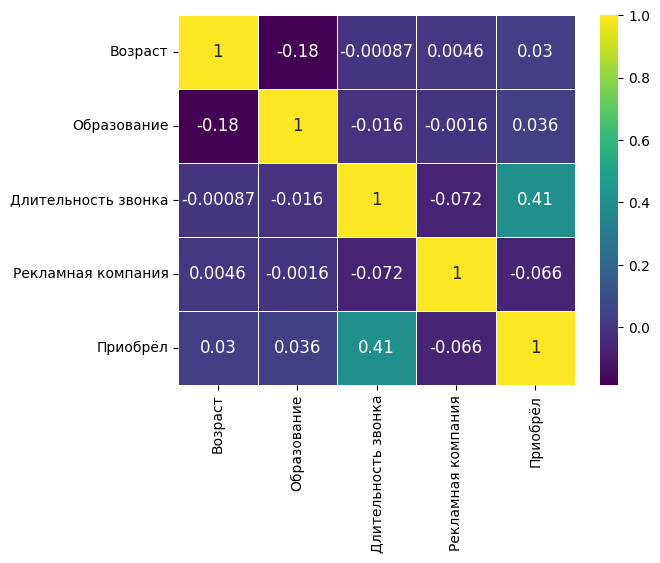

In [280]:
sns.heatmap(df.corr(),
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white", annot_kws = {'size':12})

Проверка статистических гипотез

##### Проверим взаимосвязь наличия кредита с образованием, возрастом и наличием Ипотеки
Для этого используем критерий $Hi^2$ Пирсона


In [50]:
i = "Образование"
j = "Кредит"
for i in ['Образование', 'Возраст', 'Ипотека']:
    df_clean = df.dropna(subset=[i,j])
    cons_table = st.contingency.crosstab(df_clean[i], df_clean[j])
    p_value = st.chi2_contingency(cons_table[1])[1]
    alpha = .05
    if p_value <= alpha:
        conclusion = "Нулевая гипотеза отклонена - есть зависимость между: "
    else: conclusion = "Нулевая гипотеза верна - нет зависимости между: "
    print(p_value, conclusion, i, j)

0.19263452148464316 Нулевая гипотеза верна - нет зависимости между:  Образование Кредит
0.009153042340560387 Нулевая гипотеза отклонена - есть зависимость между:  Возраст Кредит
1.3839401847144125e-20 Нулевая гипотеза отклонена - есть зависимость между:  Ипотека Кредит


##### Проверим однородность распределения данных
Для этого используем t-критерий Стьюдента

In [51]:
df_housing = df.query("Ипотека == 1")
df_no_housing = df.query("Ипотека == 0")
results = st.ttest_ind(df_housing['Возраст'],
                       df_no_housing['Возраст'],
                       equal_var = False)
alpha = .05
print(f'Средний возраст:\nИпотека есть: {df_housing["Возраст"].mean()}\tНет ипотеки: {df_no_housing["Возраст"].mean()}')
# вывод значения p-value на экран
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу - Мат. ожидания выброк не равны")
else:
    print("Не получилось отвергнуть нулевую гипотезу - Мат. ожидания выброк равны")

Средний возраст:
Ипотека есть: 40.01001112347052	Нет ипотеки: 40.044195038126944
0.7427031293726776
Не получилось отвергнуть нулевую гипотезу - Мат. ожидания выброк равны


In [56]:
df_success = df.query("Приобрёл == 1")
df_no_success = df.query("Приобрёл == 0")
results = st.ttest_ind(df_success['Возраст'],
                       df_no_success['Возраст'],
                       equal_var = False)
alpha = .05
print(f'Средний возраст:\nИпотека есть: {df_success["Возраст"].mean()}\tНет ипотеки: {df_no_success["Возраст"].mean()}')
# вывод значения p-value на экран
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу - Мат. ожидания выброк не равны")
else:
    print("Не получилось отвергнуть нулевую гипотезу - Мат. ожидания выброк равны")

Средний возраст:
Ипотека есть: 40.91314655172414	Нет ипотеки: 39.911185290576775
1.8047932698425662e-06
Отвергаем нулевую гипотезу - Мат. ожидания выброк не равны


#### Машинное обучение - кластеризация

In [212]:
df = pd.read_csv('bankmarketing1.csv', sep=';',header = None, names=['Возраст','Работа', "Семейное положение", 'Образование','Задолженность','Ипотека','Кредит','Контакт','Месяц звонка','День недели звонка','Длительность звонка','Рекламная компания','Результат рекламы', 'Приобрёл'])
df['Приобрёл'] = df['Приобрёл'].apply(lambda x: {"yes":1, "no":0, "unknown":pd.NA}[x])
df.head()

,Возраст,Работа,Семейное положение,Образование,Задолженность,Ипотека,Кредит,Контакт,Месяц звонка,День недели звонка,Длительность звонка,Рекламная компания,Результат рекламы,Приобрёл
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,nonexistent,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,nonexistent,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,nonexistent,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,nonexistent,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,nonexistent,0


In [213]:
df[(df['Образование'] == 'unknown')|(df['Образование'] == 'illiterate')]['Образование'] = 'basic.4y' # переобозначим неграмотных и неизвестных как получившими минимальное образование, чтобы сделать этот класс базовым и далее сделаем дами
df = pd.get_dummies(df, columns=['Образование'], dtype= 'int64')

df['Работа'] =  df['Работа'].apply(lambda x: 'unemployed' if x == 'unknown' else x) # переобозначим неграмотных и неизвестных как получившими минимальное образование, чтобы сделать этот класс базовым и далее сделаем дами
df = pd.get_dummies(df, columns=['Работа'])

df = pd.get_dummies(df, columns=['Ипотека'])

df = pd.get_dummies(df, columns=['Кредит'])

df = pd.get_dummies(df, columns=['Задолженность'])


df['Семейное положение'] =  df['Семейное положение'].apply(lambda x: 'single' if x == 'unknown' else x)# переобозначим неизвестных одинокими, чтобы взять за базу
df = pd.get_dummies(df, columns=['Семейное положение'])

df = pd.get_dummies(df, columns=['Контакт'])

df = pd.get_dummies(df, columns=['Месяц звонка'])

df = pd.get_dummies(df, columns=['День недели звонка'])

df = pd.get_dummies(df, columns=['Результат рекламы'])

df.head()

,Возраст,Длительность звонка,Рекламная компания,Приобрёл,Образование_basic.4y,Образование_basic.6y,Образование_basic.9y,Образование_high.school,Образование_illiterate,Образование_professional.course,Образование_university.degree,Образование_unknown,Работа_admin.,Работа_blue-collar,Работа_entrepreneur,Работа_housemaid,Работа_management,Работа_retired,Работа_self-employed,Работа_services,Работа_student,Работа_technician,Работа_unemployed,Ипотека_no,Ипотека_unknown,Ипотека_yes,Кредит_no,Кредит_unknown,Кредит_yes,Задолженность_no,Задолженность_unknown,Задолженность_yes,Семейное положение_divorced,Семейное положение_married,Семейное положение_single,Контакт_cellular,Контакт_telephone,Месяц звонка_apr,Месяц звонка_aug,Месяц звонка_dec,Месяц звонка_jul,Месяц звонка_jun,Месяц звонка_mar,Месяц звонка_may,Месяц звонка_nov,Месяц звонка_oct,Месяц звонка_sep,День недели звонка_fri,День недели звонка_mon,День недели звонка_thu,День недели звонка_tue,День недели звонка_wed,Результат рекламы_failure,Результат рекламы_nonexistent,Результат рекламы_success
0,56,261,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,149,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,226,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,151,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,307,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [214]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans


In [215]:
for col in df.select_dtypes('object').columns:
    print(df[col].unique())
    df[col] = df[col].apply(lambda x: int(x))

Для поиска закономерностей используем алгоритм понижения размерности TSNE

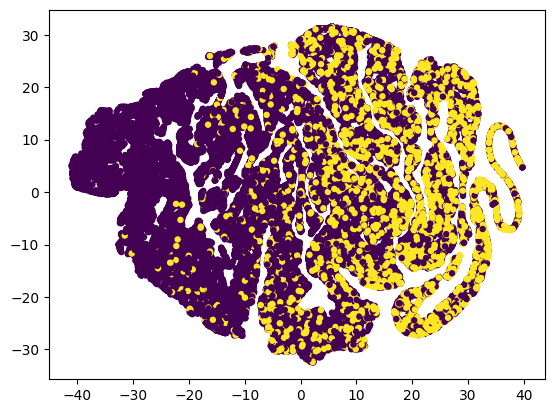

In [217]:
model = TSNE(learning_rate=150, n_iter=600 )

transformed = model.fit_transform(df.drop(columns='Приобрёл'))

# Представляем результат в двумерных координатах
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=df['Приобрёл'], s = 13)
plt.show()

Благодраря методу понижения размерности данных мы увидели, что хоть у кластеров нет ткой структуры,
но всё равно данные можно разделить на два кластера, в одном из которых преобладают продажи продукта

Если компания захочет вновь предложить клиентам свой продукт им стоит в первую очередь обратить внимание на клиентов в правом кластере
Чтобы его выделить возьмём все объекты больше 0

In [220]:
df['cluster'] = x_axis
df['cluster'] = df['cluster'].apply(lambda x: 1 if x>0 else 0)

Из интересного кластер с наибольшим числом покупателей характеризуется более взрослой аудиторией, а также более продолжительными звонками
19% людей, составляющих его, приобрели продукт
Также кластер составляет 49% от всех опрошенных

In [221]:
df[df['cluster'] == 1].describe()

,Возраст,Длительность звонка,Рекламная компания,Приобрёл,Образование_basic.4y,Образование_basic.6y,Образование_basic.9y,Образование_high.school,Образование_illiterate,Образование_professional.course,Образование_university.degree,Образование_unknown,Работа_admin.,Работа_blue-collar,Работа_entrepreneur,Работа_housemaid,Работа_management,Работа_retired,Работа_self-employed,Работа_services,Работа_student,Работа_technician,Работа_unemployed,Ипотека_no,Ипотека_unknown,Ипотека_yes,Кредит_no,Кредит_unknown,Кредит_yes,Задолженность_no,Задолженность_unknown,Задолженность_yes,Семейное положение_divorced,Семейное положение_married,Семейное положение_single,Контакт_cellular,Контакт_telephone,Месяц звонка_apr,Месяц звонка_aug,Месяц звонка_dec,Месяц звонка_jul,Месяц звонка_jun,Месяц звонка_mar,Месяц звонка_may,Месяц звонка_nov,Месяц звонка_oct,Месяц звонка_sep,День недели звонка_fri,День недели звонка_mon,День недели звонка_thu,День недели звонка_tue,День недели звонка_wed,Результат рекламы_failure,Результат рекламы_nonexistent,Результат рекламы_success,cluster
count,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.0,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.000000,20812.0
mean,40.523880,412.357150,2.289737,0.194984,0.107342,0.056794,0.149817,0.233039,0.000336,0.123294,0.285172,0.044205,0.246540,0.231693,0.035701,0.025418,0.072650,0.045887,0.032097,0.097636,0.023112,0.156736,0.032529,0.457525,0.022679,0.519796,0.829137,0.022679,0.148184,0.791659,0.208341,0.0,0.115174,0.608303,0.276523,0.641793,0.358207,0.074524,0.128532,0.005814,0.175764,0.118682,0.014030,0.355372,0.091101,0.019412,0.016769,0.183308,0.199741,0.212474,0.202383,0.202095,0.103306,0.849750,0.046944,1.0
std,10.647336,287.867603,2.081041,0.396198,0.309555,0.231454,0.356901,0.422777,0.018337,0.328783,0.451507,0.205556,0.431007,0.421924,0.185547,0.157395,0.259568,0.209245,0.176262,0.296829,0.150262,0.363561,0.177405,0.498205,0.148882,0.499620,0.376398,0.148882,0.355291,0.406132,0.406132,0.0,0.319239,0.488141,0.447289,0.479485,0.479485,0.262629,0.334689,0.076029,0.380628,0.323421,0.117619,0.478637,0.287760,0.137971,0.128409,0.386928,0.399815,0.409068,0.401786,0.401572,0.304365,0.357325,0.211524,0.0
min,17.000000,154.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,32.000000,232.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0
50%,39.000000,316.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [123]:
df[df['cluster'] == 0].describe()

,Возраст,Длительность звонка,Рекламная компания,Приобрёл,Образование_basic.4y,Образование_basic.6y,Образование_basic.9y,Образование_high.school,Образование_illiterate,Образование_professional.course,Образование_university.degree,Образование_unknown,Работа_admin.,Работа_blue-collar,Работа_entrepreneur,Работа_housemaid,Работа_management,Работа_retired,Работа_self-employed,Работа_services,Работа_student,Работа_technician,Работа_unemployed,Работа_unknown,Ипотека_no,Ипотека_unknown,Ипотека_yes,Кредит_no,Кредит_unknown,Кредит_yes,Задолженность_no,Задолженность_unknown,Задолженность_yes,Семейное положение_divorced,Семейное положение_married,Семейное положение_single,Семейное положение_unknown,Контакт_cellular,Контакт_telephone,Месяц звонка_apr,Месяц звонка_aug,Месяц звонка_dec,Месяц звонка_jul,Месяц звонка_jun,Месяц звонка_mar,Месяц звонка_may,Месяц звонка_nov,Месяц звонка_oct,Месяц звонка_sep,День недели звонка_fri,День недели звонка_mon,День недели звонка_thu,День недели звонка_tue,День недели звонка_wed,Результат рекламы_failure,Результат рекламы_nonexistent,Результат рекламы_success,cluster
count,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.00000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.000000,18806.0
mean,39.341859,94.939062,2.887164,0.025258,0.093428,0.053175,0.143624,0.230724,0.000532,0.131288,0.307561,0.039668,0.262310,0.215782,0.034882,0.025577,0.068223,0.036637,0.036265,0.095874,0.020632,0.170797,0.025045,0.007976,0.447198,0.025311,0.527491,0.818622,0.025311,0.156067,0.790758,0.209082,0.00016,0.107625,0.596086,0.294640,0.001648,0.629639,0.370361,0.052909,0.172870,0.002712,0.175263,0.139796,0.012549,0.308891,0.109061,0.015686,0.010263,0.197171,0.214559,0.206636,0.189514,0.192120,0.102414,0.879187,0.018398,0.0
std,10.204933,43.184427,3.365690,0.156912,0.291039,0.224387,0.350718,0.421307,0.023054,0.337724,0.461496,0.195184,0.439902,0.411375,0.183487,0.157874,0.252135,0.187875,0.186954,0.294426,0.142152,0.376341,0.156267,0.088955,0.497217,0.157072,0.499257,0.385342,0.157072,0.362929,0.406778,0.406664,0.01263,0.309915,0.490694,0.455893,0.040568,0.482914,0.482914,0.223857,0.378145,0.052007,0.380202,0.346784,0.111321,0.462048,0.311724,0.124263,0.100786,0.397873,0.410527,0.404903,0.391927,0.393977,0.303200,0.325918,0.134391,0.0
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,31.000000,64.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
50%,37.000000,96.000000,2.000000,0.000000,0.000000,0.

#### Машинное обучение Логистическая регрессия

In [126]:
df.head(3)

,Возраст,Работа,Семейное положение,Образование,Задолженность,Ипотека,Кредит,Контакт,Месяц звонка,День недели звонка,Длительность звонка,Рекламная компания,Результат рекламы,Приобрёл
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,nonexistent,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,nonexistent,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,nonexistent,0


In [222]:
df.drop(columns='Результат рекламы_nonexistent', inplace=True)
df.drop(columns='День недели звонка_mon', inplace=True)
df.drop(columns='Месяц звонка_dec', inplace=True)
df.drop(columns='Контакт_cellular', inplace=True)
df.drop(columns='Семейное положение_single', inplace=True)
df.drop(columns='Задолженность_no', inplace=True)
df.drop(columns='Кредит_no', inplace=True)
df.drop(columns='Ипотека_no', inplace=True)
df.drop(columns='Работа_unemployed', inplace=True)
df.drop(columns='Образование_basic.4y', inplace=True)

In [131]:
from statsmodels.api import Logit

In [227]:
ml = Logit(df['Приобрёл'], df.drop(columns='Приобрёл')).fit()

         Current function value: 0.225590
         Iterations: 35


In [162]:
ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Приобрёл   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41145
Method:                           MLE   Df Model:                           42
Date:                Sun, 18 Dec 2022   Pseudo R-squ.:                  0.3469
Time:                        18:13:59   Log-Likelihood:                -9469.8
converged:                      False   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Возраст                            -0.0012      0.002     -0.641      0.522      -0.005       0.003
Длительность звонка                 0.0043   5.25e-05     81.726      0.000       0.004       0.004
Рекламная компания                 -0.0862      0.010     -8.482      0.000      -0.106      -0.066
Образование_basic.6y               -0.0980      0.116     -0.847      0.397      -0.325       0.129
Образование_basic.9y               -0.2662      0.083     -3.199      0.001      -0.429      -0.103
Образование_high.school            -0.2094      0.084     -2.504      0.012      -0.373      -0.046
Образование_illiterate              1.0990      0.690      1.592      0.111      -0.254       2.452
Образование_professional.course    -0.1148      0.091     -1.257      0.209      -0.294       0.064
Образование_university.degree      -0.0205      0.082     -0.250      0.803      -0.181       0.140
Образование_unknown                 0.0852      0.113      0.755      0.450      -0.136       0.306
Работа_admin.                      -0.4281      0.080     -5.356      0.000      -0.585      -0.271
Работа_blue-collar                 -0.8295      0.105     -7.907      0.000      -1.035      -0.624
Работа_entrepreneur                -0.7389      0.135     -5.479      0.000      -1.003      -0.475
Работа_housemaid                   -0.4936      0.155     -3.189      0.001      -0.797      -0.190
Работа_management                  -0.5533      0.114     -4.867      0.000      -0.776      -0.330
Работа_retired                      0.2441      0.122      2.001      0.045       0.005       0.483
Работа_self-employed               -0.6510      0.141     -4.616      0.000      -0.927      -0.375
Работа_services                    -0.6660      0.109     -6.107      0.000      -0.880      -0.452
Работа_student                      0.1766      0.092      1.928      0.054      -0.003       0.356
Работа_technician                  -0.5891      0.105     -5.634      0.000      -0.794      -0.384
Ипотека_unknown                    -0.0412   1.24e+16  -3.33e-18      1.000   -2.43e+16    2.43e+16
Ипотека_yes                        -0.0167      0.047     -0.356      0.722      -0.109       0.075
Кредит_unknown                     -0.0412   1.24e+16  -3.33e-18      1.000   -2.43e+16    2.43e+16
Кредит_yes                         -0.0948      0.057     -1.661      0.097      -0.207       0.017
Задолженность_unknown              -0.6786      0.064    -10.591      0.000      -0.804      -0.553
Задолженность_yes                 -18.5161   2.66e+04     -0.001      0.999   -5.21e+04    5.21e+04
Семейное положение_divorced        -0.2013      0.074     -2.704      0.007      -0.347      -0.055
Семейное положение_married         -0.1792      0.048     -3.722      0.000      -0.274      -0.085
Контакт_telephone                  -1.1076      0.053    -21.003      0.000      -1.211      -1.004
Месяц звонка_apr                   -1.990

Как бы странно это ни казалось, но наличие какого либо кредитного продукта или задолженности - оказались самыми мало значимыми факторами
Другими словами на них не стоит обращать особого внимания

Далее удалим малозначимые факторы для повышения обобщающей способности модели

In [228]:
df.drop(columns='Приобрёл').drop(columns= ml.pvalues[ml.pvalues >0.3].index[1:].values)

,Возраст,Длительность звонка,Рекламная компания,Образование_basic.6y,Образование_basic.9y,Образование_high.school,Образование_illiterate,Образование_professional.course,Образование_university.degree,Работа_admin.,Работа_blue-collar,Работа_entrepreneur,Работа_housemaid,Работа_management,Работа_retired,Работа_self-employed,Работа_services,Работа_technician,Ипотека_unknown,Кредит_unknown,Кредит_yes,Задолженность_unknown,Семейное положение_divorced,Семейное положение_married,Контакт_telephone,Месяц звонка_apr,Месяц звонка_aug,Месяц звонка_jul,Месяц звонка_jun,Месяц звонка_mar,Месяц звонка_may,Месяц звонка_nov,Месяц звонка_oct,Месяц звонка_sep,День недели звонка_tue,День недели звонка_wed,Результат рекламы_failure,Результат рекламы_success,cluster
0,56,261,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,57,149,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,37,226,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,40,151,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,56,307,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
41184,46,383,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
41185,56,189,2,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
41186,44,442,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [269]:
ml1 = Logit(df['Приобрёл'], df.drop(columns='Приобрёл').drop(columns= ml.pvalues[(ml.pvalues >0.3)|((ml.pvalues>=0) == False)].index[1:].values)).fit()

Optimization terminated successfully.
         Current function value: 0.226804
         Iterations 8


In [270]:
ml1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Приобрёл   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41152
Method:                           MLE   Df Model:                           35
Date:                Sun, 18 Dec 2022   Pseudo R-squ.:                  0.3557
Time:                        19:35:08   Log-Likelihood:                -9341.6
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Возраст                            -0.0130      0.002     -6.554      0.000      -0.017      -0.009
Длительность звонка                 0.0035   7.64e-05     46.027      0.000       0.003       0.004
Рекламная компания                 -0.0852      0.012     -7.374      0.000      -0.108      -0.063
Образование_basic.6y               -0.2581      0.106     -2.446      0.014      -0.465      -0.051
Образование_basic.9y               -0.4458      0.076     -5.850      0.000      -0.595      -0.296
Образование_high.school            -0.4463      0.068     -6.568      0.000      -0.580      -0.313
Образование_illiterate              1.2156      0.689      1.765      0.078      -0.134       2.566
Образование_professional.course    -0.3467      0.081     -4.276      0.000      -0.506      -0.188
Образование_university.degree      -0.2552      0.067     -3.792      0.000      -0.387      -0.123
Работа_admin.                      -0.6448      0.078     -8.267      0.000      -0.798      -0.492
Работа_blue-collar                 -1.0899      0.085    -12.854      0.000      -1.256      -0.924
Работа_entrepreneur                -0.9385      0.133     -7.079      0.000      -1.198      -0.679
Работа_housemaid                   -0.7021      0.145     -4.830      0.000      -0.987      -0.417
Работа_management                  -0.7364      0.103     -7.142      0.000      -0.938      -0.534
Работа_retired                      0.2186      0.117      1.874      0.061      -0.010       0.447
Работа_self-employed               -0.8392      0.127     -6.594      0.000      -1.089      -0.590
Работа_services                    -0.8973      0.097     -9.265      0.000      -1.087      -0.707
Работа_technician                  -0.8059      0.086     -9.370      0.000      -0.974      -0.637
Кредит_yes                         -0.1006      0.055     -1.831      0.067      -0.208       0.007
Задолженность_unknown              -0.6494      0.063    -10.300      0.000      -0.773      -0.526
Семейное положение_divorced        -0.1492      0.073     -2.040      0.041      -0.293      -0.006
Семейное положение_married         -0.1644      0.048     -3.417      0.001      -0.259      -0.070
Контакт_telephone                  -1.1065      0.059    -18.834      0.000      -1.222      -0.991
Месяц звонка_apr                   -1.5644      0.094    -16.684      0.000      -1.748      -1.381
Месяц звонка_aug                   -2.1532      0.091    -23.729      0.000      -2.331      -1.975
Месяц звонка_jul                   -2.4632      0.091    -27.026      0.000      -2.642      -2.285
Месяц звонка_jun                   -1.3968      0.097    -14.448      0.000      -1.586      -1.207
Месяц звонка_mar                    0.1864      0.125      1.486      0.137      -0.059       0.432
Месяц звонка_may                   -2.3814      0.087    -27.361      0.000      -2.552      -2.211
Месяц звонка_nov                   -2.374

Результаты анализа модели показали следующие интересные результаты:
1) Наиболее подвержены покупке те, кому компания уже предлагала свои продукты, причём ещё больше подвержены те, кто приобретал их
2) Возраст оказался мало значимым фактором
3) Суда по переменной "Рекламная компания" назойливые частые звоник отрицательно сказываются на желании клиента что-либо приобрести
4) Продолжительность звонка также положительно сказывается на желании клиента
5) Наиболее вероятная покупка произойдёт если позвонить клиенту в декабре, марте, сенятбре или октябре
6) В выделенном нами кластере люди более расположены к покупке

#### Линейная регрессия

Как было выяснено ранее на качество продажи влияет продолжительность звонка, она же и отражает желание разговаривать
Тогда мы попробуем выяснить когда же выгоднее всего звонить

In [184]:
from statsmodels.api import GLM

Для этого создадим отдельные признаки, объединяющие день недели и род деятельости

In [204]:
df.columns

Index(['Возраст', 'Длительность звонка', 'Рекламная компания', 'Приобрёл',
       'Образование_basic.6y', 'Образование_basic.9y',
       'Образование_high.school', 'Образование_illiterate',
       'Образование_professional.course', 'Образование_university.degree',
       'Образование_unknown', 'Работа_admin.', 'Работа_blue-collar',
       'Работа_entrepreneur', 'Работа_housemaid', 'Работа_management',
       'Работа_retired', 'Работа_self-employed', 'Работа_services',
       'Работа_student', 'Работа_technician', 'Ипотека_unknown', 'Ипотека_yes',
       'Кредит_unknown', 'Кредит_yes', 'Задолженность_unknown',
       'Задолженность_yes', 'Семейное положение_divorced',
       'Семейное положение_married', 'Контакт_telephone', 'Месяц звонка_apr',
       'Месяц звонка_aug', 'Месяц звонка_jul', 'Месяц звонка_jun',
       'Месяц звонка_mar', 'Месяц звонка_may', 'Месяц звонка_nov',
       'Месяц звонка_oct', 'Месяц звонка_sep', 'День недели звонка_fri',
       'День недели звонка_thu', 'День 

In [210]:
X = df[['Месяц звонка_apr',
       'Месяц звонка_aug', 'Месяц звонка_jul', 'Месяц звонка_jun',
       'Месяц звонка_mar', 'Месяц звонка_may', 'Месяц звонка_nov',
       'Месяц звонка_oct', 'Месяц звонка_sep']]
for i in df.columns[11:21]:
    for j in df.columns[-6:-2]:
        X[f'{i}_{j[-5:len(j)]}'] = df[i]*df[j]
X.head()

,Месяц звонка_apr,Месяц звонка_aug,Месяц звонка_jul,Месяц звонка_jun,Месяц звонка_mar,Месяц звонка_may,Месяц звонка_nov,Месяц звонка_oct,Месяц звонка_sep,Работа_admin._а_fri,Работа_admin._а_thu,Работа_admin._а_tue,Работа_admin._а_wed,Работа_blue-collar_а_fri,Работа_blue-collar_а_thu,Работа_blue-collar_а_tue,Работа_blue-collar_а_wed,Работа_entrepreneur_а_fri,Работа_entrepreneur_а_thu,Работа_entrepreneur_а_tue,Работа_entrepreneur_а_wed,Работа_housemaid_а_fri,Работа_housemaid_а_thu,Работа_housemaid_а_tue,Работа_housemaid_а_wed,Работа_management_а_fri,Работа_management_а_thu,Работа_management_а_tue,Работа_management_а_wed,Работа_retired_а_fri,Работа_retired_а_thu,Работа_retired_а_tue,Работа_retired_а_wed,Работа_self-employed_а_fri,Работа_self-employed_а_thu,Работа_self-employed_а_tue,Работа_self-employed_а_wed,Работа_services_а_fri,Работа_services_а_thu,Работа_services_а_tue,Работа_services_а_wed,Работа_student_а_fri,Работа_student_а_thu,Работа_student_а_tue,Работа_student_а_wed,Работа_technician_а_fri,Работа_technician_а_thu,Работа_technician_а_tue,Работа_technician_а_wed
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [211]:
reg = GLM(df['Длительность звонка'], X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                  Generalized Linear Model Regression Results                  
===============================================================================
Dep. Variable:     Длительность звонка   No. Observations:                41188
Model:                             GLM   Df Residuals:                    41139
Model Family:                 Gaussian   Df Model:                           48
Link Function:                identity   Scale:                          67323.
Method:                           IRLS   Log-Likelihood:            -2.8737e+05
Date:                 Sun, 18 Dec 2022   Deviance:                   2.7696e+09
Time:                         19:04:28   Pearson chi2:                 2.77e+09
No. Iterations:                      3   Pseudo R-squ. (CS):         -0.0002764
Covariance Type:             nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Месяц звонка_apr             278.4388      5.524     50.408      0.000     267.613     289.265
Месяц звонка_aug             216.7836      4.094     52.947      0.000     208.759     224.808
Месяц звонка_jul             257.0247      3.842     66.906      0.000     249.495     264.554
Месяц звонка_jun             227.4877      4.190     54.292      0.000     219.275     235.700
Месяц звонка_mar             229.1138     11.343     20.199      0.000     206.883     251.345
Месяц звонка_may             244.7394      3.261     75.056      0.000     238.348     251.130
Месяц звонка_nov             229.4702      4.709     48.726      0.000     220.240     238.700
Месяц звонка_oct             269.4383     10.029     26.867      0.000     249.782     289.094
Месяц звонка_sep             279.2191     11.174     24.989      0.000     257.319     301.119
Работа_admin._а_fri            8.7568      6.309      1.388      0.165      -3.609      21.122
Работа_admin._а_thu           22.1213      6.190      3.574      0.000       9.988      34.254
Работа_admin._а_tue           12.3501      6.337      1.949      0.051      -0.070      24.770
Работа_admin._а_wed           27.4906      6.334      4.340      0.000      15.077      39.904
Работа_blue-collar_а_fri      16.7214      6.719      2.489      0.013       3.553      29.890
Работа_blue-collar_а_thu      32.0648      6.545      4.899      0.000      19.236      44.893
Работа_blue-collar_а_tue      25.1268      6.732      3.732      0.000      11.932      38.321
Работа_blue-collar_а_wed      25.8284      6.450      4.005      0.000      13.187      38.470
Работа_entrepreneur_а_fri      9.1870     15.986      0.575      0.566     -22.145      40.519
Работа_entrepreneur_а_thu     -3.0090     14.715     -0.204      0.838     -31.850      25.833
Работа_entrepreneur_а_tue     45.4331     16.201      2.804      0.005      13.680      77.186
Работа_entrepreneur_а_wed     39.1826     15.831      2.475      0.013       8.154      70.211
Работа_housemaid_а_fri        -2.7766     19.414     -0.143      0.886     -40.828      35.275
Работа_housemaid_а_thu        17.0951     18.625      0.918      0.359     -19.409      53.599
Работа_housemaid_а_tue        23.8420     17.033      1.400      0.162      -9.542      57.226
Работа_housemaid_а_wed        36.0197     17.937      2.008      0.045       0.864      71.175
Работа_management_а_fri        1.1691     11.577      0.101      0.920     -21.521      23.859
Работа_management_а_thu       32.0746     11.036      2.906      0.004      10.444      53.705
Работа_management_а_tue       38.3202     11.099      3.452      0.001      16.566      60.075
Работа_management_а_wed       13.5941     11.061      1.229      0.219      -8.084      35.273
Работа_retired_а_fri          15

Из результатов регрессии видим, что звонить лучше:
1)Администраторам в среду
2)Чёрнорабочим в четверг
3)Актёрам во вторник
4)Домохозяинам в среду
5)Руководящему персоналу во вторник
6)Людям на пенсии в среду
7)Самозанятым в среду
8)Работникам сферы услуг в четверг
9)Студентам в пятницу
10)Техническим работникам во вторник
А месяц лучше всего выбрать - сентябрь, апрель или октябрь
